In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df=pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
df['is_male'] = np.where(df['sex'] == 'male', 1, 0)
df['is_child'] = np.where(df['age'] == '5-14 years', 1, 0)
df['is_teen'] = np.where(df['age'] == '15-24 years', 1, 0)
df['is_young'] = np.where(df['age'] == '25-34 years', 1, 0)
df['is_adult'] = np.where(df['age'] == '35-54 years', 1, 0)
df['is_old'] = np.where(df['age'] == '55-74 years', 1, 0)
df['is_oldster'] = np.where(df['age'] == '75+ years', 1, 0)

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male,is_child,is_teen,is_young,is_adult,is_old,is_oldster
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1,0,1,0,0,0,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1,0,0,0,1,0,0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0,0,1,0,0,0,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1,0,0,0,0,0,1
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,1,0,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
df=df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [7]:
df.isnull().any()

Country               False
Year                  False
Gender                False
Age                   False
SuicidesNo            False
Population            False
Suicides100kPop       False
CountryYear           False
HDIForYear             True
GdpForYearMoney       False
GdpPerCapitalMoney    False
Generation            False
dtype: bool

In [9]:
df.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

Как видно, большая часть записей для HDIForYear пустая, так что удалим этот столбец

Min Year : 1985
Max Year : 2016


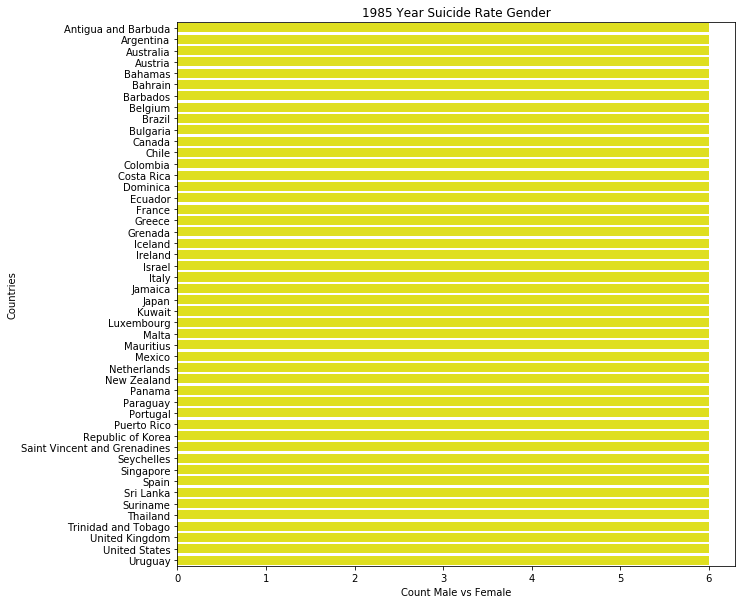

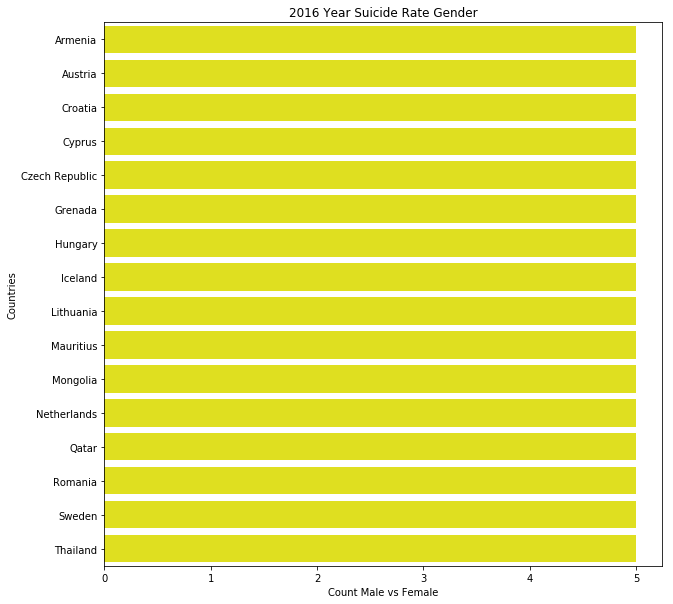

In [11]:
min_year=min(df.Year)
max_year=max(df.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

#1985 min year,2016 max year.

data_country=df[(df['Year']==min_year)]

country_1985=df[(df['Year']==min_year)].Country.unique()
country_1985_male=[]
country_1985_female=[]

for country in country_1985:
    country_1985_male.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='male')]))
    country_1985_female.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='female')])) 
    
#We found the ratio of men and women who committed suicide in some countries in 1985 and we are now charting.

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_male,color='red')
sns.barplot(y=country_1985,x=country_1985_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('1985 Year Suicide Rate Gender')
plt.show()

#Very odd all the rates came on an equal level. So let's do max year.

data_country=df[(df['Year']==max_year)]

country_2016=df[(df['Year']==max_year)].Country.unique()
country_2016_male=[]
country_2016_female=[]

for country in country_2016:
    country_2016_male.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='male')]))
    country_2016_female.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='female')])) 
    
#We found the ratio of men and women who committed suicide in some countries in 1985 and we are now charting.

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_male,color='red')
sns.barplot(y=country_2016,x=country_2016_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('2016 Year Suicide Rate Gender')
plt.show()

Хотя в 1985 году уровень самоубийств был широко распространен во многих странах, в 2016 году этот показатель значительно снизился. Теперь рассмотрим другие особенности этих стран.

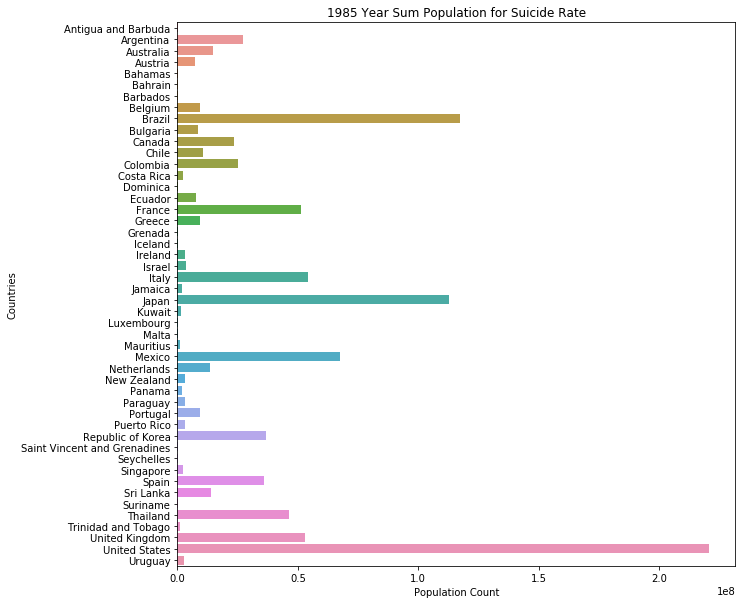

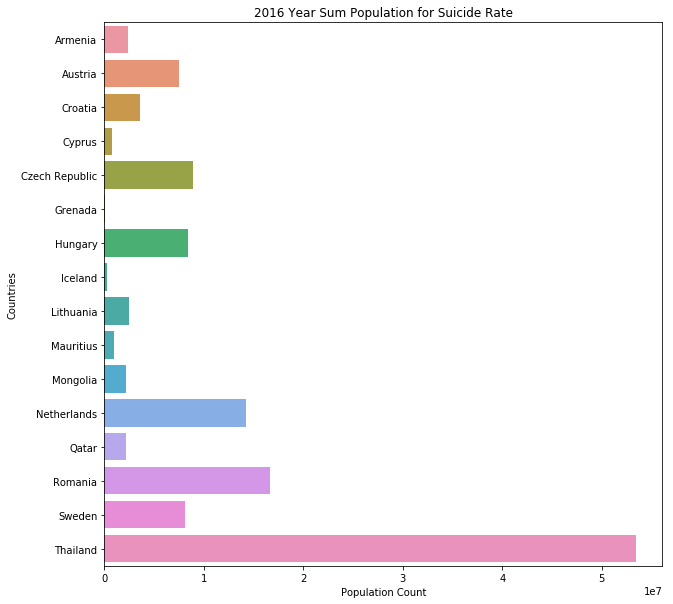

In [14]:
data_country=df[(df['Year']==min_year)]

country_1985_population=[]

for country in country_1985:
    country_1985_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('1985 Year Sum Population for Suicide Rate')
plt.show()

#######################################################

data_country=df[(df['Year']==max_year)]

country_2016_population=[]

for country in country_2016:
    country_2016_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('2016 Year Sum Population for Suicide Rate')
plt.show()

In [15]:
suicideGender1985=data_country.groupby(['Country','Gender']).SuicidesNo.sum()

In [16]:
suicideGender1985

Country         Gender
Armenia         female      14
                male        53
Austria         female     295
                male       906
Croatia         female     168
                male       515
Cyprus          female       5
                male        31
Czech Republic  female     258
                male      1060
Grenada         female       0
                male         0
Hungary         female     446
                male      1315
Iceland         female       4
                male        36
Lithuania       female     129
                male       693
Mauritius       female      15
                male        83
Mongolia        female      52
                male       371
Netherlands     female     613
                male      1273
Qatar           female       5
                male        63
Romania         female     310
                male      1643
Sweden          female     348
                male       782
Thailand        female     842
                

In [18]:
data_country=df[(df['Year']==min_year)]

data_age_5_14=[]
data_age_15_24=[]
data_age_25_34=[]
data_age_35_54=[]
data_age_55_74=[]
data_age_75=[]

for country in country_1985:
        data_age_5_14.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='5-14 years')]))
        data_age_15_24.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='15-24 years')]))
        data_age_25_34.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='25-34 years')]))
        data_age_35_54.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='35-54 years')]))
        data_age_55_74.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='55-74 years')]))
        data_age_75.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='75+ years')]))
        

#######################################################

data_country=df[(df['Year']==max_year)]

data_age_5_14=[]
data_age_15_24=[]
data_age_25_34=[]
data_age_35_54=[]
data_age_55_74=[]
data_age_75=[]

for country in country_2016:
        data_age_5_14.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='5-14 years')]))
        data_age_15_24.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='15-24 years')]))
        data_age_25_34.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='25-34 years')]))
        data_age_35_54.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='35-54 years')]))
        data_age_55_74.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='55-74 years')]))
        data_age_75.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='75+ years')]))
        
#there is an equal rate. We need to make the query process a little more complicated.

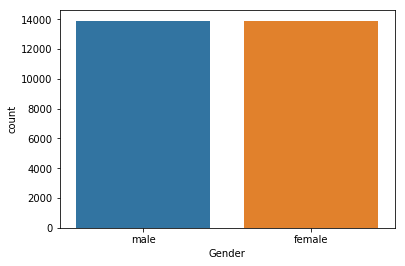

In [20]:
sns.countplot(df.Gender)
plt.show()

In [21]:
df.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [23]:
df['GdpPerCapitalMoney'].unique()

array([ 796,  769,  833, ..., 1964, 2150, 2309], dtype=int64)

In [25]:
print("Max : ",max(df['GdpPerCapitalMoney'].unique()))
print('Min : ',min(df['GdpPerCapitalMoney'].unique()))

Max :  126352
Min :  251


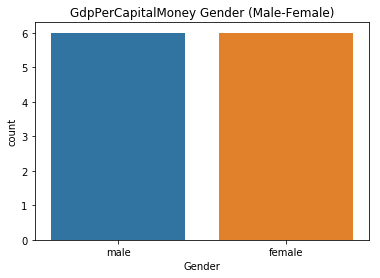

In [26]:
sns.countplot(df[df['GdpPerCapitalMoney']==251].Gender)
plt.title("GdpPerCapitalMoney Gender (Male-Female)")
plt.show()

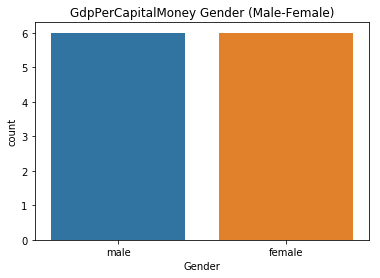

In [28]:
sns.countplot(df[df['GdpPerCapitalMoney']==126352].Gender)
plt.title("GdpPerCapitalMoney Gender (Male-Female)")
plt.show()

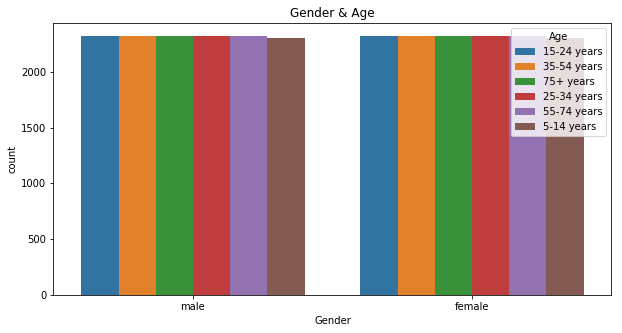

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(df.Gender,hue=df.Age)
plt.title('Gender & Age')
plt.show()
#there has been an even gender & hue age distribution.

In [32]:
df.groupby('Age')['Gender'].count()

Age
15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
55-74 years    4642
75+ years      4642
Name: Gender, dtype: int64

In [34]:
suicidesNo=[]
for country in df.Country.unique():
    suicidesNo.append(sum(df[df['Country']==country].SuicidesNo))   

In [36]:
suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(df.Country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)

In [37]:
data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)

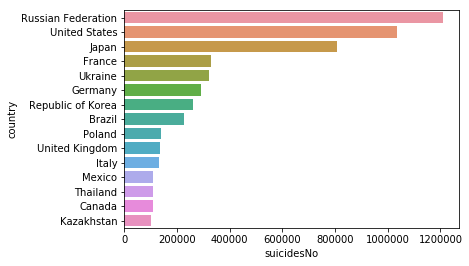

In [38]:
sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15])
plt.show()

После изучения наших данных мы изучили общий уровень самоубийств и подготовили диаграмму, которая показывает наибольшие значения.

In [43]:
group_data=df.groupby(['Age','Gender'])['SuicidesNo'].sum().unstack()
group_data=group_data.reset_index().melt(id_vars='Age')
group_data

,Age,Gender,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267


In [44]:
group_data_female=group_data.iloc[:6,:]
group_data_male=group_data.iloc[6:,:]

In [45]:
group_data_female

,Age,Gender,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [46]:
group_data_male

,Age,Gender,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


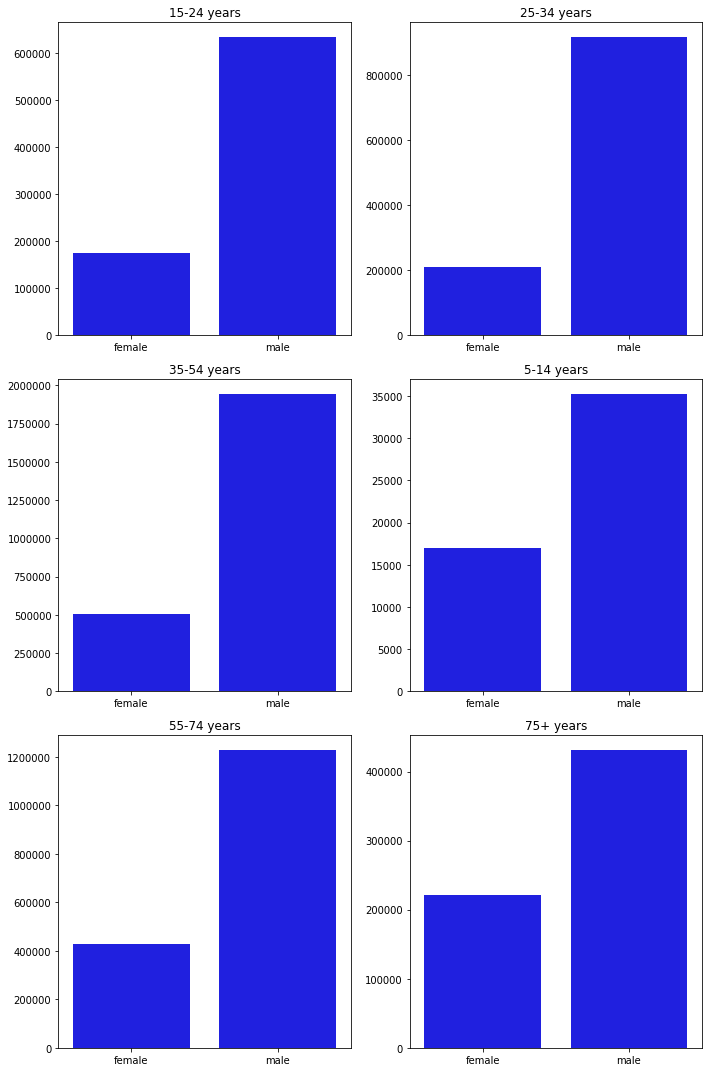

In [47]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

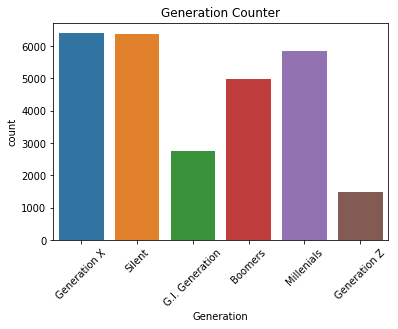

In [48]:
sns.countplot(df.Generation)
plt.title('Generation Counter')
plt.xticks(rotation=45)
plt.show()

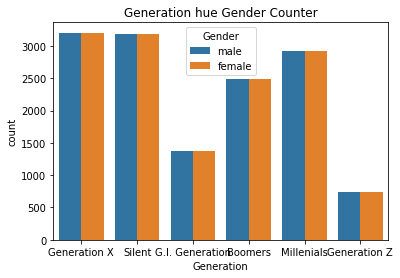

In [49]:
sns.countplot(df.Generation,hue=df.Gender)
plt.title('Generation hue Gender Counter')
plt.show()

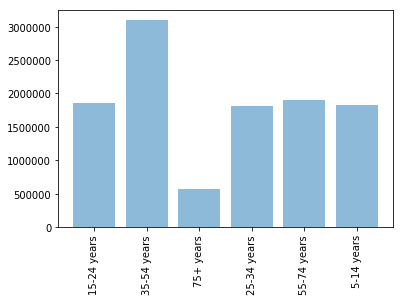

In [50]:
index_population=[]
for age in df['Age'].unique():
    index_population.append(sum(df[df['Age']==age].Population)/len(df[df['Age']==age].Population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [51]:
index_population

[1861901.5286514433,
 3096916.8726841877,
 573735.728780698,
 1817773.284575614,
 1896433.7225333909,
 1821842.3507592191]

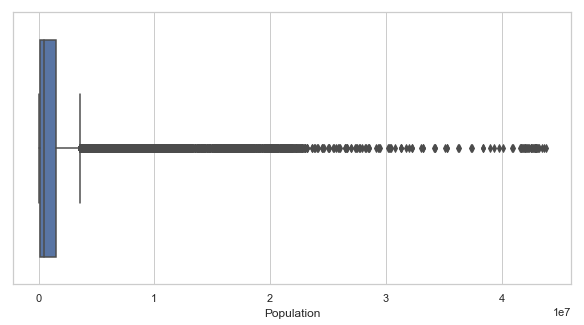

In [52]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(df['Population'])
plt.show()

In [54]:
df.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


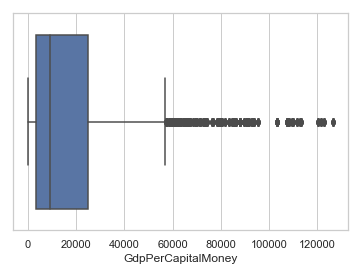

In [55]:
sns.set(style='whitegrid')
sns.boxplot(df['GdpPerCapitalMoney'])
plt.show()

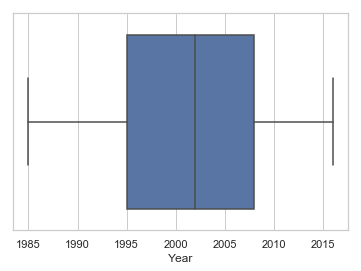

In [56]:
sns.set(style='whitegrid')
sns.boxplot(df.Year)
plt.show()

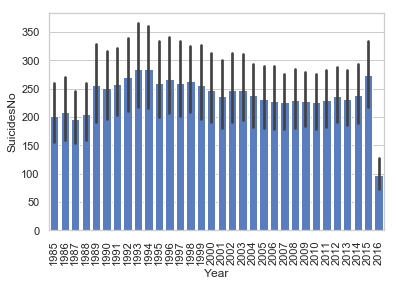

In [57]:
sns.set_color_codes("muted")
sns.barplot(x="Year", y="SuicidesNo", data=df,
            label="Year Suicides", color="b")
plt.xticks(rotation=90)
plt.show()

<Figure size 504x504 with 0 Axes>

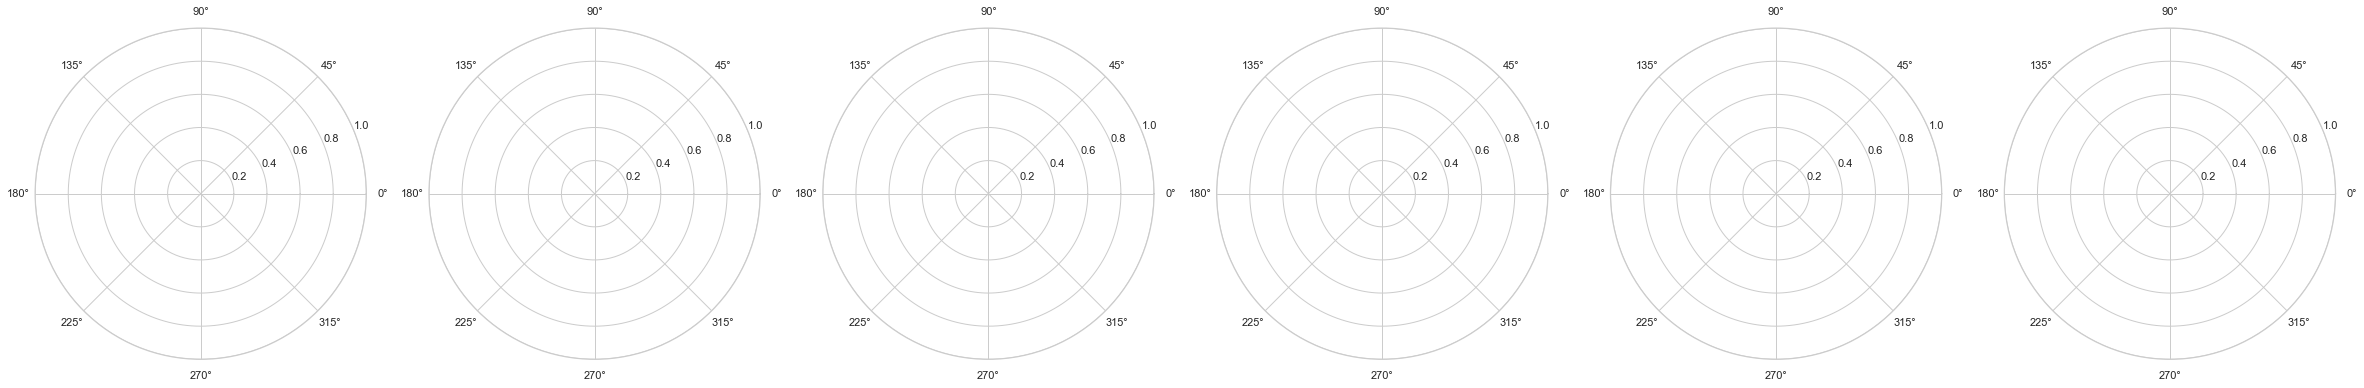

In [58]:
plt.figure(figsize=(7,7))
g = sns.FacetGrid(df, col="Generation", hue="Year",
                  subplot_kws=dict(projection='polar'), height=5.5,
                  sharex=False, sharey=False, despine=False)

plt.show()

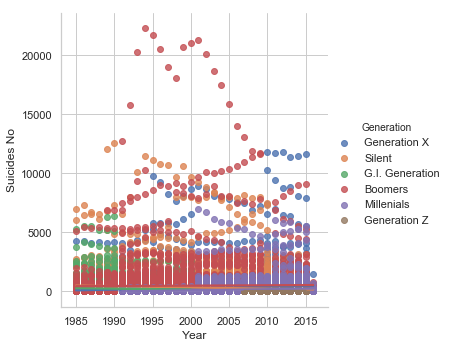

In [59]:
g = sns.lmplot(x="Year", y="SuicidesNo", hue="Generation",
               truncate=True, height=5, data=df)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Suicides No")
plt.show()

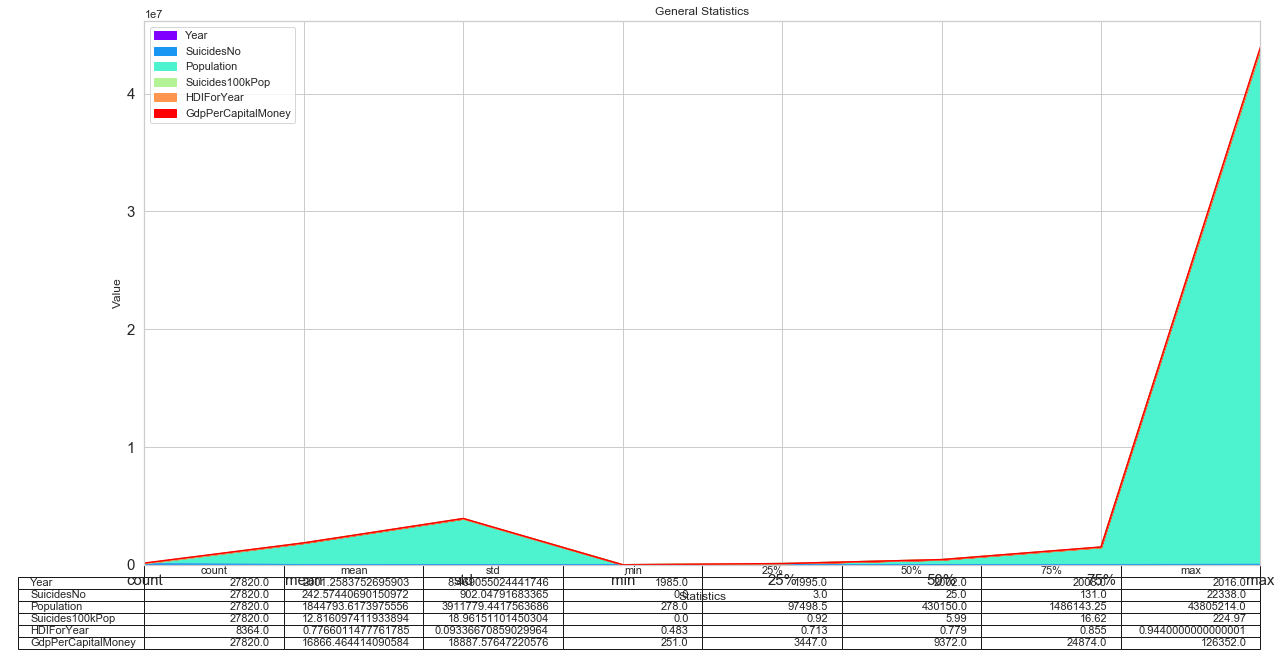

In [60]:
df.describe().plot(kind = "Area",fontsize=15, figsize = (20,10), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics")
plt.show()

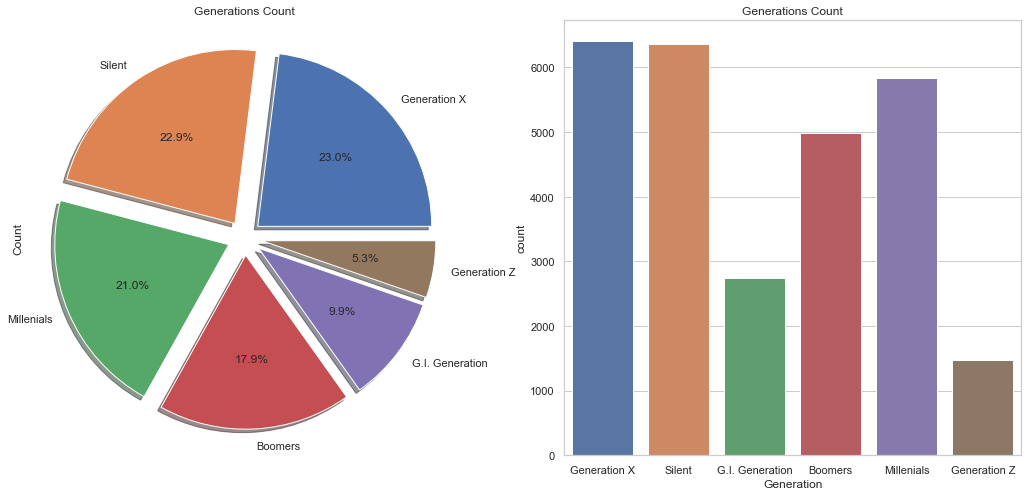

In [62]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('Generation',data=df,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

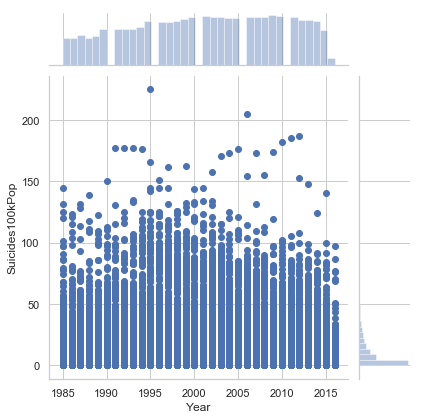

In [63]:
fig=sns.jointplot(y='Suicides100kPop',x='Year',data=df)
plt.show()

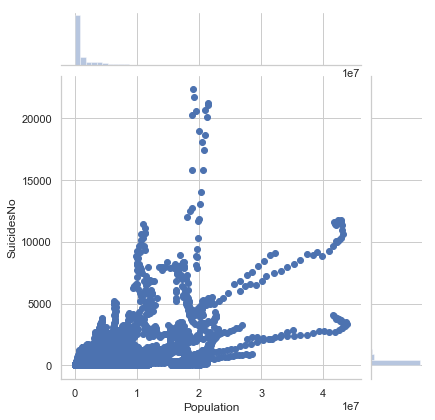

In [64]:
fig=sns.jointplot(y='SuicidesNo',x='Population',data=df)
plt.show()

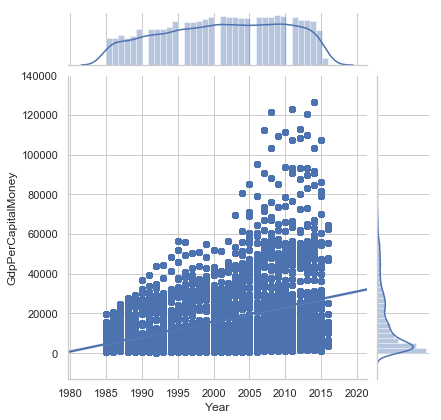

In [65]:
sns.jointplot("Year", "GdpPerCapitalMoney", data=df, kind="reg")
plt.show()

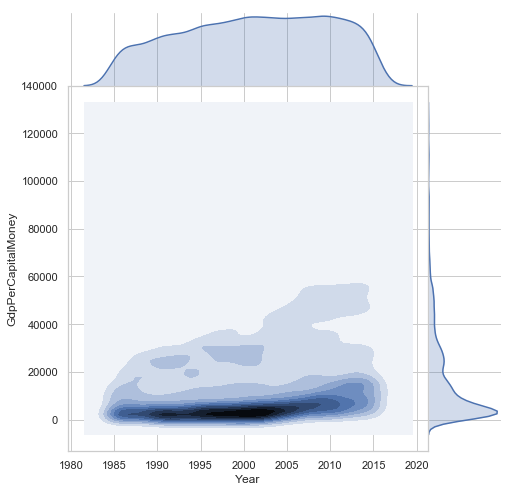

In [66]:
g = sns.jointplot(df.Year,df.GdpPerCapitalMoney, kind="kde", height=7, space=0)
plt.show()

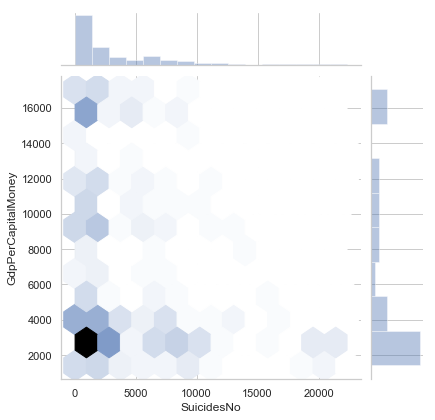

In [68]:
fig=sns.jointplot(y='GdpPerCapitalMoney',x='SuicidesNo',kind='hex',data=df[df['Country']=='Russian Federation'])
plt.show()

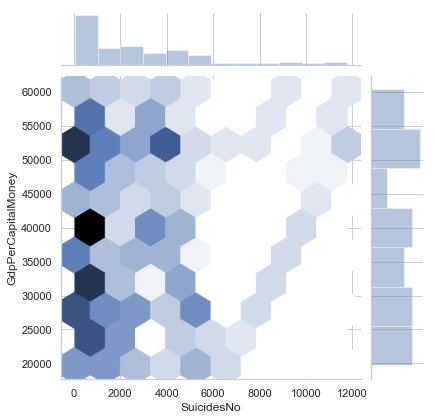

In [70]:
fig=sns.jointplot(y='GdpPerCapitalMoney',x='SuicidesNo',kind='hex',data=df[df['Country']=='United States'])
plt.show()

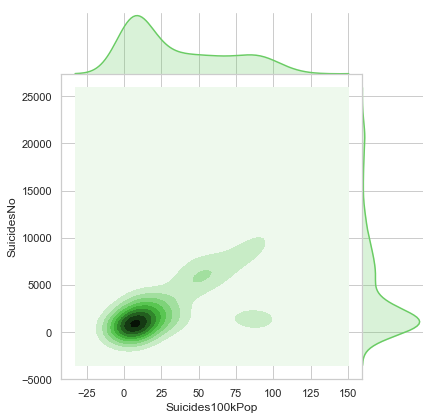

In [71]:
sns.jointplot("Suicides100kPop", "SuicidesNo", data=df[df['Country']=='Russian Federation'], kind="kde",space=0,color='g')
plt.show()

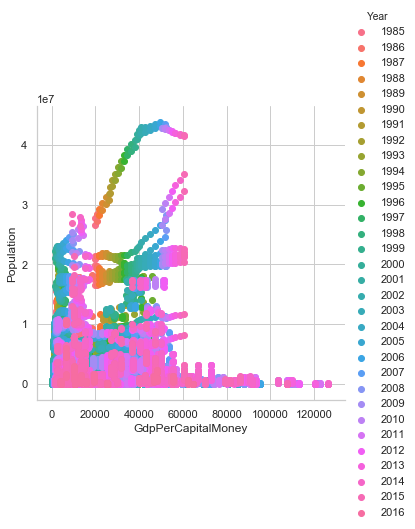

In [72]:
%matplotlib inline
sns.FacetGrid(df,hue='Year',size=5).map(plt.scatter,'GdpPerCapitalMoney','Population').add_legend()
plt.show()

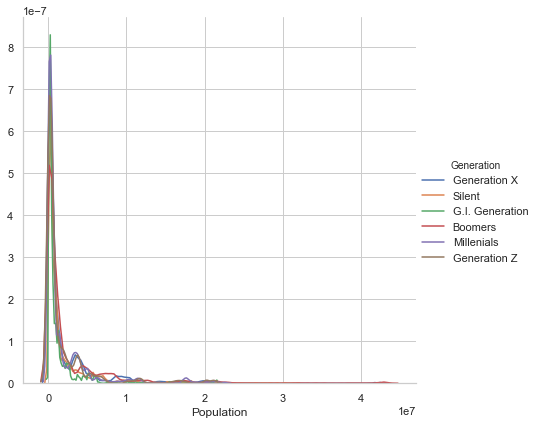

In [73]:
sns.FacetGrid(df, hue="Generation", size=6).map(sns.kdeplot, "Population").add_legend()
plt.ioff() 
plt.show()

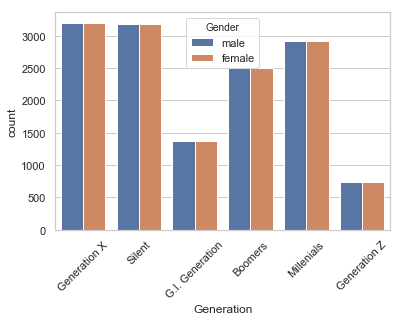

In [74]:
sns.countplot(x="Generation", hue="Gender",
                 data=df)
plt.xticks(rotation=45)
plt.show()

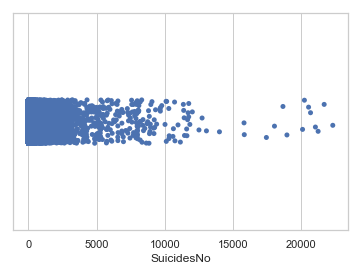

In [75]:
sns.stripplot(x=df['SuicidesNo'])
plt.show()

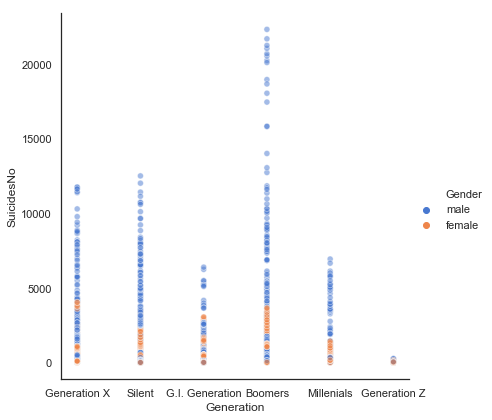

In [77]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Generation",y="SuicidesNo",hue="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.show()

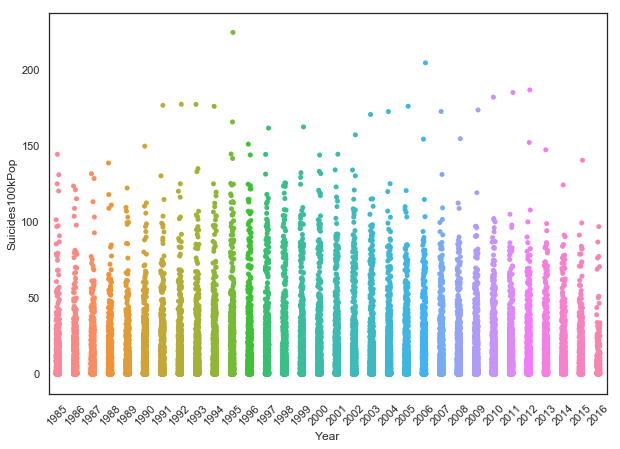

In [78]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Year",y='Suicides100kPop',data=df)
plt.xticks(rotation=45)
plt.show()

<Figure size 720x720 with 0 Axes>

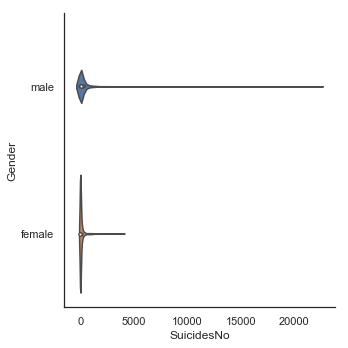

In [79]:
plt.figure(figsize=(10,10))
sns.factorplot(x="SuicidesNo", y="Gender", kind='violin',data=df)
plt.show()

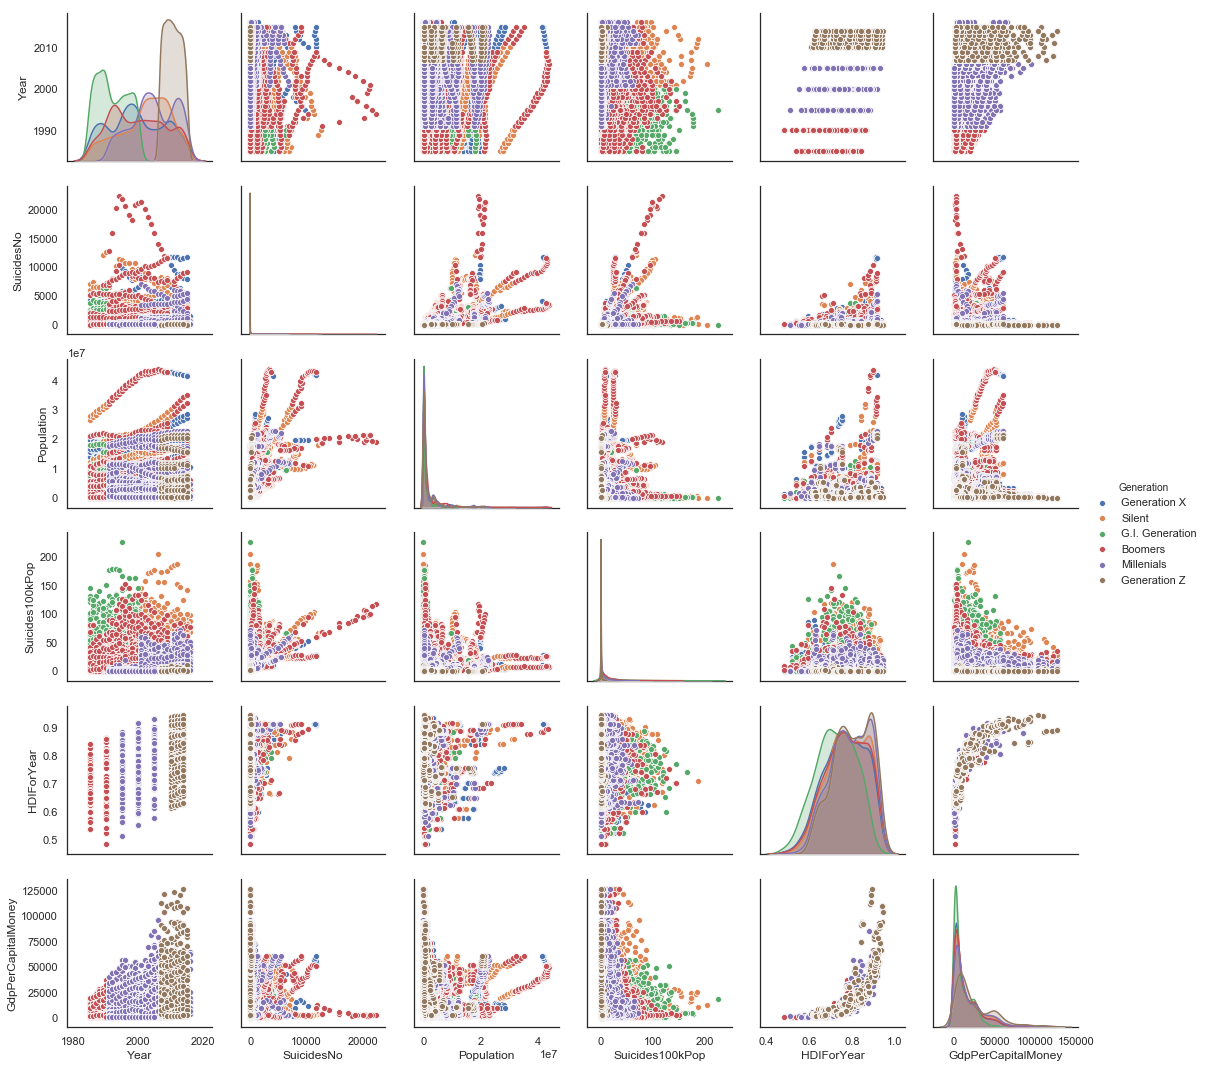

In [81]:
sns.pairplot(df,hue='Generation')
plt.show()

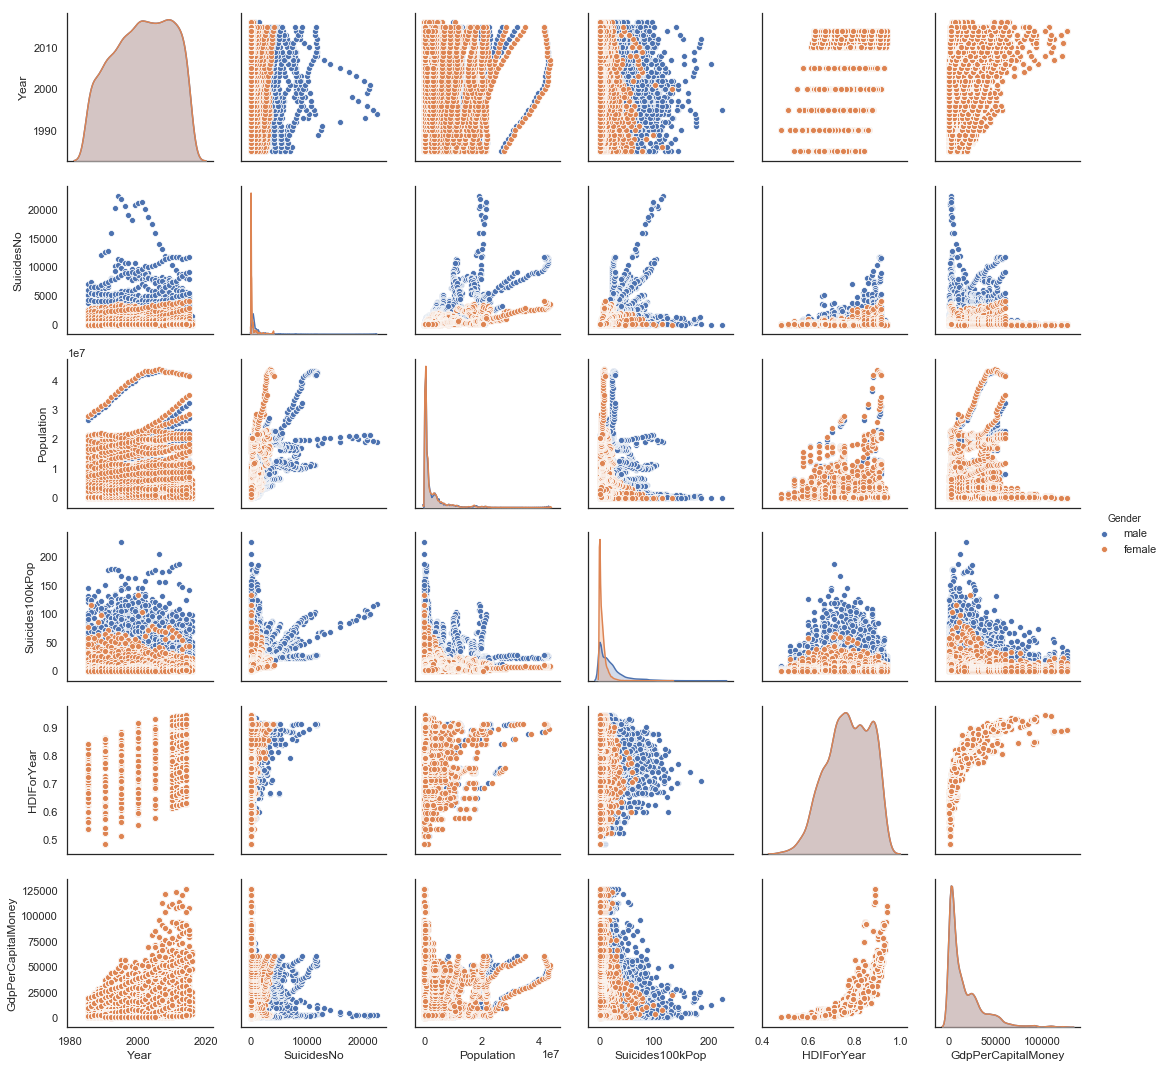

In [82]:
sns.pairplot(df, hue="Gender")
plt.show()

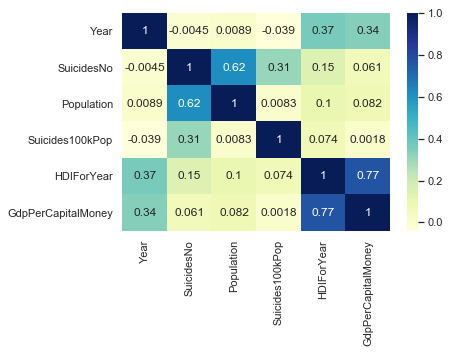

In [83]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()